<a href="https://colab.research.google.com/github/gurwoghd/2023_WFK_ICT-Laos-/blob/main/sourcecodes/ch6_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: making Perceptron for AND, OR, NAND, and XOR logicGate

In [ ]:
from sklearn.linear_model import Perceptron
import numpy as np

X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train1 = np.array([0,0,0,1]) # and

model = Perceptron()
model.fit(X_train, y_train1)

model.score(X_train, y_train1)

1.0

In [ ]:
y_train2 = np.array([0,1,1,1]) # or

model2= Perceptron()
model2.fit(X_train, y_train2)
model2.score(X_train, y_train2)

1.0

In [ ]:
y_train3 = np.array([1,1,1,0]) # nand
model3 = Perceptron()
model3.fit(X_train, y_train3)
model3.score(X_train, y_train3)

1.0

In [ ]:
y_train4 = np.array([1,0,0,1]) # xor
model4 = Perceptron()
model4.fit(X_train, y_train4)
model4.score(X_train, y_train4)

0.5

In [ ]:
model4.predict(np.array([[0,0],[0,1],[1,0],[1,1]]))

array([0, 0, 0, 0])

# Lab: Solving XOR Problem using sklearn.neural_network.MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
mlp.score(X_train, y_train4)

1.0

In [ ]:
mlp.predict(np.array([[0,0],[0,1],[1,0],[1,1]]))

array([1, 0, 0, 1])

# Lab: MNIST dataset

In [9]:
import numpy as np
import pandas as pd

## Loading mnist dataset

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X = mnist.data
y = mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

## Draw an image
Hint: use plt.imshow(matrix, cmap='binary')

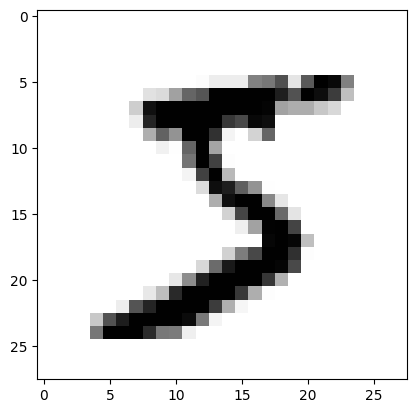

This is 5 and the type of this is <class 'str'>


In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl

digit = X.iloc[0]
digit_image = np.array(digit).reshape(28,28)

plt.imshow(digit_image, cmap='binary')
plt.show()
print("This is", y.iloc[0], 'and the type of this is', type(y.iloc[0]))

In [30]:
# transform the type of y elements from str to int
y = y.astype(np.uint8)

## split train and test data; 7:3

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size = 0.7)

## Make Multiple Neural Network

In [33]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)

MLPClassifier()

In [34]:
model.score(X_train, y_train)

0.9899183673469387

In [35]:
model.score(X_test, y_test)

0.9611428571428572

## Check it with sample data

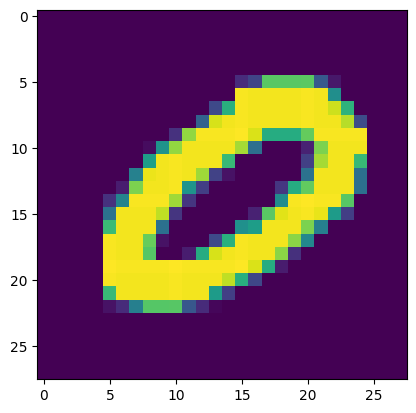

In [48]:
digit_image2 = np.array(X_test.iloc[0]).reshape(28,28)
plt.imshow(digit_image2)
plt.show()

In [54]:
result = model.predict(np.array([X_test.iloc[0]]))
result[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0

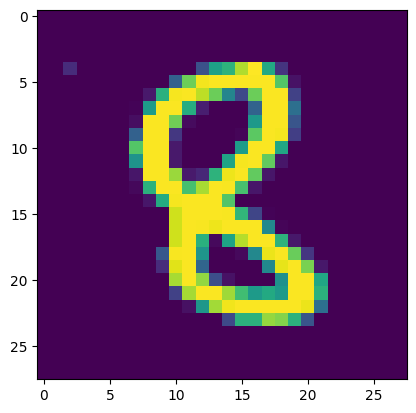

In [55]:
digit_image2 = np.array(X_test.iloc[125]).reshape(28,28)
plt.imshow(digit_image2)
plt.show()

In [57]:
result = model.predict(np.array([X_test.iloc[125]]))
result[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


8

## Learn MNIST 6

### make a train and test data whose elements are either True, when they are 6, or False, when they are not 6.

In [62]:
y_train_6 = y_train == 6

In [63]:
y_test_6 = y_test == 6

In [65]:
model_6 = MLPClassifier()
model_6.fit(X_train, y_train_6)

MLPClassifier()

### Confusion matrix

In [66]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
y_train_pred = cross_val_predict(model, X_train, y_train_6, cv = 3)

In [68]:
cm = confusion_matrix(y_train_6, y_train_pred)

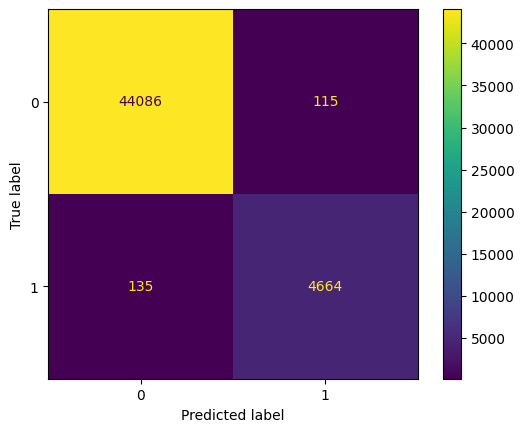

In [69]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### get Precision and Recall

In [70]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_6, y_train_pred)

0.9759363883657669

In [71]:
recall_score(y_train_6, y_train_pred)

0.9718691394040425

# Lab: Heart Disease classification